### Introduzione

Il dataset dei **Pinguini di Palmer** contiene misure biometriche di tre specie di pinguini (Adelie, Gentoo e Chinstrap), osservate su tre isole dell'arcipelago di Palmer, in Antartide.

### Obiettivo del Notebook 🐧⚖️

L'obiettivo è **addestrare un modello di classificazione per prevedere la specie di un pinguino** in base a caratteristiche fisiche come la lunghezza del becco, la profondità, la lunghezza delle pinne e la massa corporea.


### Import & Settings

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

In [ ]:

penguins = pd.read_csv('penguins_size.csv')

### Statistiche descrittive & Preliminary Analysis

In [ ]:
print("Prime righe del dataset:")
penguins.head(10)

Prime righe del dataset:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:

print("\nInformazioni sul dataset:")
penguins.info()


Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
print("\nValori mancanti:")
penguins.isnull().sum()



Valori mancanti:


,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10



Distribuzione delle specie:


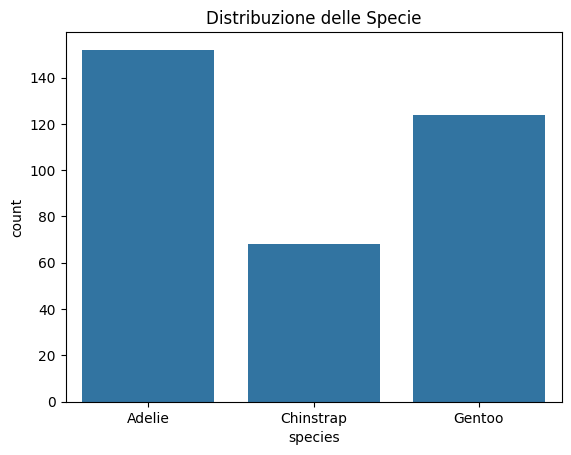

In [ ]:
print("\nDistribuzione delle specie:")
sns.countplot(x='species', data=penguins)
plt.title('Distribuzione delle Specie')
plt.show()

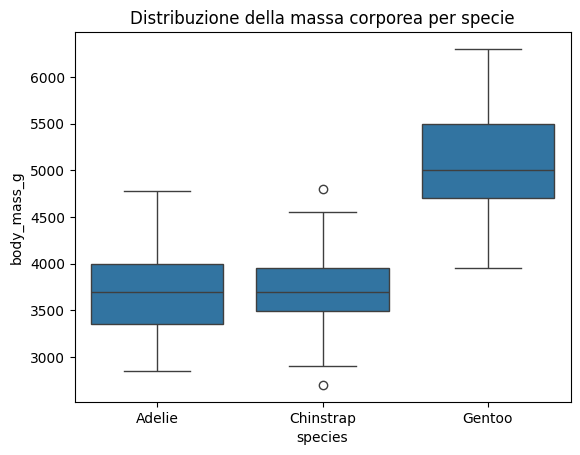

In [ ]:
sns.boxplot(x='species', y='body_mass_g', data=penguins)
plt.title('Distribuzione della massa corporea per specie')
plt.show()

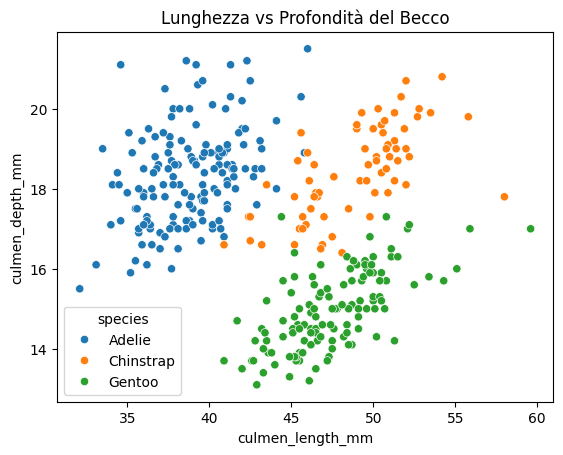

In [ ]:

sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=penguins)
plt.title('Lunghezza vs Profondità del Becco')
plt.show()

### Training Preprocessing

In [ ]:

df = penguins.dropna()
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])
df['species'] = le.fit_transform(df['species'])  # target

<ipython-input-9-af987f2ac45a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le.fit_transform(df['sex'])
<ipython-input-9-af987f2ac45a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = le.fit_transform(df['island'])
<ipython-input-9-af987f2ac45a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

### Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("\n[Logistic Regression]")
print(classification_report(y_test, log_preds))
print("Accuratezza:", accuracy_score(y_test, log_preds))


[Logistic Regression]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

Accuratezza: 0.9850746268656716


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\n[Random Forest]")
print(classification_report(y_test, rf_preds))
print("Accuratezza:", accuracy_score(y_test, rf_preds))


[Random Forest]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuratezza: 1.0


In [ ]:

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("\n[XGBoost]")
print(classification_report(y_test, xgb_preds))
print("Accuratezza:", accuracy_score(y_test, xgb_preds))


[XGBoost]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuratezza: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
